In [133]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [119]:
df = pd.read_csv("sensor.csv")

In [120]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'sensor_00', 'sensor_01', 'sensor_02',
       'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07',
       'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17',
       'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22',
       'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27',
       'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32',
       'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37',
       'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42',
       'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47',
       'sensor_48', 'sensor_49', 'sensor_50', 'sensor_51', 'machine_status'],
      dtype='object')

In [121]:
df.isnull().sum()

Unnamed: 0             0
timestamp              0
sensor_00          10208
sensor_01            369
sensor_02             19
sensor_03             19
sensor_04             19
sensor_05             19
sensor_06           4798
sensor_07           5451
sensor_08           5107
sensor_09           4595
sensor_10             19
sensor_11             19
sensor_12             19
sensor_13             19
sensor_14             21
sensor_15         220320
sensor_16             31
sensor_17             46
sensor_18             46
sensor_19             16
sensor_20             16
sensor_21             16
sensor_22             41
sensor_23             16
sensor_24             16
sensor_25             36
sensor_26             20
sensor_27             16
sensor_28             16
sensor_29             72
sensor_30            261
sensor_31             16
sensor_32             68
sensor_33             16
sensor_34             16
sensor_35             16
sensor_36             16
sensor_37             16


In [122]:
# Drop columns that have a lot of missing values

df = df.drop(['Unnamed: 0','timestamp','sensor_00','sensor_06','sensor_07','sensor_08','sensor_09',
              'sensor_15','sensor_50','sensor_51'],axis=1)

In [123]:
df

,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,...,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,machine_status
0,47.09201,53.211800,46.310760,634.375000,76.45975,37.22740,47.52422,31.11716,1.681353,419.5747,...,30.989580,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,NORMAL
1,47.09201,53.211800,46.310760,634.375000,76.45975,37.22740,47.52422,31.11716,1.681353,419.5747,...,30.989580,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,NORMAL
2,47.35243,53.211800,46.397570,638.888900,73.54598,37.86777,48.17723,32.08894,1.708474,420.8480,...,30.468750,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,NORMAL
3,47.09201,53.168400,46.397568,628.125000,76.98898,38.57977,48.65607,31.67221,1.579427,420.7494,...,30.468750,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,NORMAL
4,47.13541,53.211800,46.397568,636.458300,76.58897,39.48939,49.06298,31.95202,1.683831,419.8926,...,30.989580,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,47.69965,50.520830,43.142361,634.722229,64.59095,43.17085,54.16052,38.05424,13.265320,420.7993,...,30.468750,30.208330,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,NORMAL
220316,47.69965,50.564240,43.142361,630.902771,65.83363,43.21038,54.52602,38.53485,13.242270,422.1567,...,30.208332,29.947920,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,NORMAL
220317,47.69965,50.520830,43.142361,625.925903,67.29445,43.12836,55.11779,38.52678,13.188660,420.2166,...,29.947920,30.208330,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,NORMAL
220318,47.69965,50.520832,43.142361,635.648100,65.09175,42.35746,55.99321,38.89159,13.173460,420.5700,...,29.947916,30.208332,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,NORMAL


In [124]:
# Subsitute null value with mean value

df = df.fillna(df.mean())

In [125]:
# Label Encoding

le = LabelEncoder()

columnsToEncode = list(df.select_dtypes(include=['category','object']))

for feature in columnsToEncode:
    df[feature] = le.fit_transform(df[feature])


In [126]:
x_s = df.iloc[:,:-1]
y_s = df.iloc[:,-1]

In [127]:
# Scalling
ss = StandardScaler()
x_s = ss.fit_transform(x_s)


In [128]:
# Split Dataframe

X_train,X_test,y_train,y_test = train_test_split(x_s,y_s,test_size=0.2,shuffle=True)

In [142]:
# Create model

model = Sequential()
model.add(Dense(32,activation='selu',input_shape=[44]))
model.add(Dense(32,activation='selu'))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [143]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=30)

Epoch 1/30
5508/5508 [==============================] - 2s 403us/step - loss: 0.0571 - accuracy: 0.9816 - val_loss: 0.0055 - val_accuracy: 0.9983
Epoch 2/30
5508/5508 [==============================] - 2s 411us/step - loss: 0.0057 - accuracy: 0.9979 - val_loss: 0.0050 - val_accuracy: 0.9984
Epoch 3/30
5508/5508 [==============================] - 2s 427us/step - loss: 0.0034 - accuracy: 0.9988 - val_loss: 0.0051 - val_accuracy: 0.9986
Epoch 4/30
5508/5508 [==============================] - 2s 405us/step - loss: 0.0029 - accuracy: 0.9990 - val_loss: 0.0027 - val_accuracy: 0.9995
Epoch 5/30
5508/5508 [==============================] - 2s 397us/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0038 - val_accuracy: 0.9990
Epoch 6/30
5508/5508 [==============================] - 2s 417us/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.0041 - val_accuracy: 0.9993
Epoch 7/30
5508/5508 [==============================] - 2s 410us/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0029 -

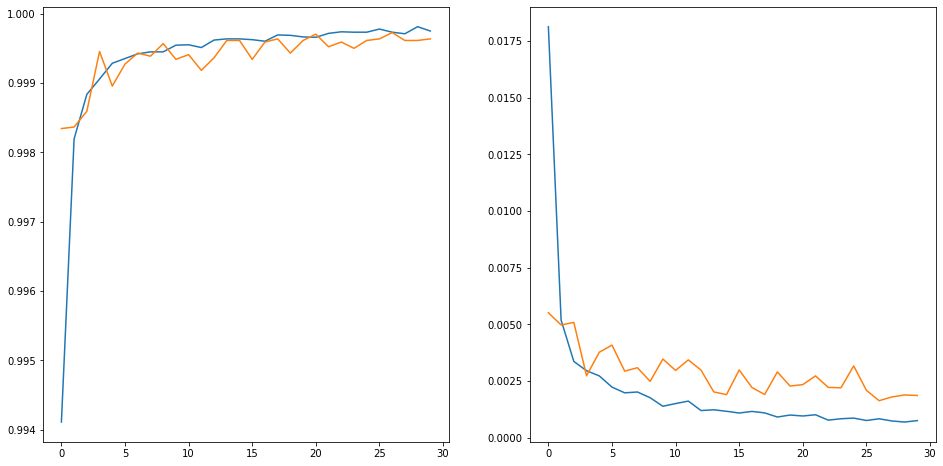

In [144]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(epochs,acc,label='acc')
plt.plot(epochs,val_acc,label='val_acc')

plt.subplot(1,2,2)
plt.plot(epochs,loss,label='loss')
plt.plot(epochs,val_loss,label='val_loss')

plt.show()